# Chapter 14: Dimension Reduction of Matrix Data

## 14.1 Clustering 2D Data in One Dimension

In [1]:
# Simulating a range of heights
import numpy as np
heights = np.arange(60, 78, 0.1)

In [2]:
# Simulating weights using heights
np.random.seed(0)
random_fluctuations = np.random.normal(scale=10, size=heights.size)
weights = 4 * heights - 130 + random_fluctuations

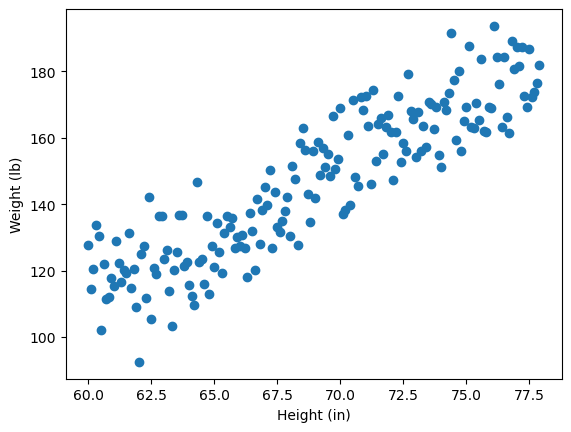

In [3]:
# Plotting 2D measurements
import matplotlib.pyplot as plt
measurements = np.array([heights, weights])
plt.scatter(measurements[0], measurements[1])
plt.xlabel('Height (in)')
plt.ylabel('Weight (lb)')
plt.show()

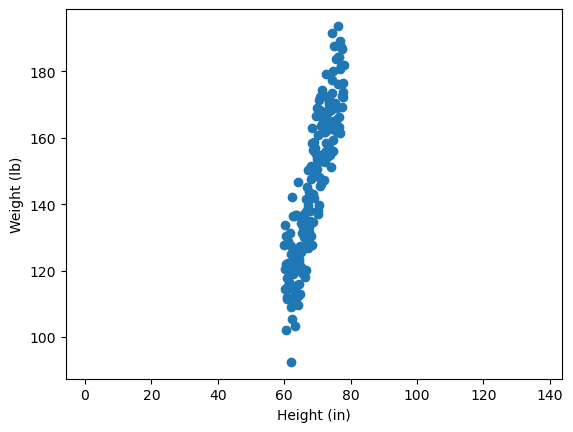

In [4]:
plt.scatter(measurements[0], measurements[1])
plt.xlabel('Height (in)')
plt.ylabel('Weight (lb)')
plt.axis('equal')
plt.show()

### 14.1.1 Reducing Dimensions Using Rotation

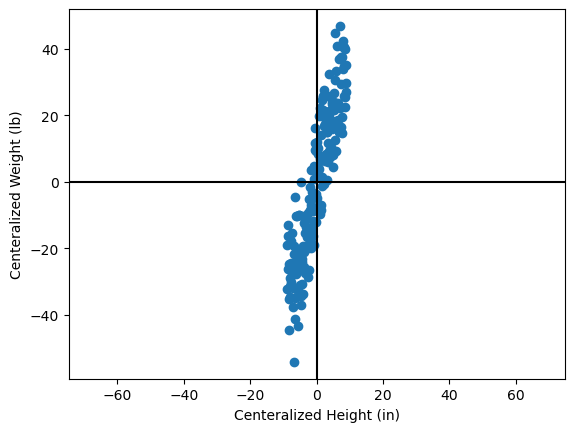

In [21]:
# Centering the measurements at the origin
centered_data = np.array([heights - heights.mean(), weights - weights.mean()])
plt.scatter(centered_data[0], centered_data[1])
plt.axhline(0, c='black')
plt.axvline(0, c='black')
plt.xlabel('Centeralized Height (in)')
plt.ylabel('Centeralized Weight (lb)')
plt.axis('equal')
plt.show()

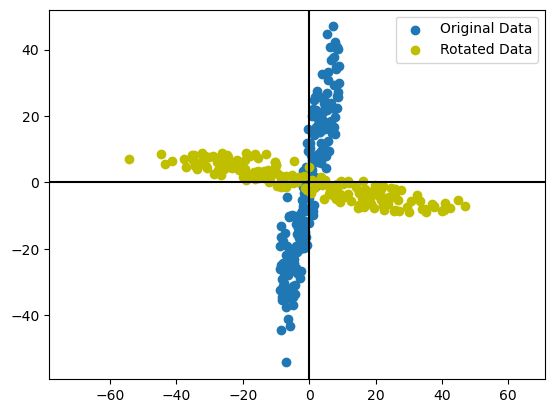

In [6]:
# Rotating centered_data by 90 degrees (using matrix rotation transformation)
from math import sin, cos
angle = np.radians(-90)
rotation_matrix = np.array([[cos(angle), -sin(angle)], [sin(angle), cos(angle)]])
rotated_data = rotation_matrix @ centered_data
plt.scatter(centered_data[0], centered_data[1], label='Original Data')
plt.scatter(rotated_data[0], rotated_data[1], c='y', label='Rotated Data')
plt.axhline(0, c='black')
plt.axvline(0, c='black')
plt.legend()
plt.axis('equal')
plt.show()

In [7]:
# Penalizing vertical y-values
data_labels = ['unrotated', 'rotated']
data_list = [centered_data, rotated_data]
for data_label, data in zip(data_labels, data_list):
    y_var = data[1].var()
    penalty = data[1] @ data[1] / data[0].size
    assert round(y_var, 14) == round(penalty, 14)
    print(f"The y-axis variance for the {data_label} data is {y_var:.2f}")

The y-axis variance for the unrotated data is 519.82
The y-axis variance for the rotated data is 27.00


In [8]:
# Measuring rotational x-axis variance
for data_label, data in zip(data_labels, data_list):
    x_var = data[0].var()
    print(f"The x-axis variance for the {data_label} data is {x_var:.2f}")

The x-axis variance for the unrotated data is 27.00
The x-axis variance for the rotated data is 519.82


In [9]:
# Confirming the conservation of total variance
total_variance = centered_data[0].var() + centered_data[1].var()
assert total_variance == rotated_data[0].var() + rotated_data[1].var()

In [10]:
# Exploring the percent coverage of axis variance
for data_label, data in zip(data_labels, data_list):
    percent_x_axis_var = 100 * data[0].var() / total_variance
    percent_y_axis_var = 100 * data[1].var() / total_variance
    print(f"In the {data_label} data, {percent_x_axis_var:.2f}% of the total variance is distributed across the x-axis")
    print(f"The remaining {percent_y_axis_var:.2f}% of the total variance is distributed across the y-axis\n")

In the unrotated data, 4.94% of the total variance is distributed across the x-axis
The remaining 95.06% of the total variance is distributed across the y-axis

In the rotated data, 95.06% of the total variance is distributed across the x-axis
The remaining 4.94% of the total variance is distributed across the y-axis



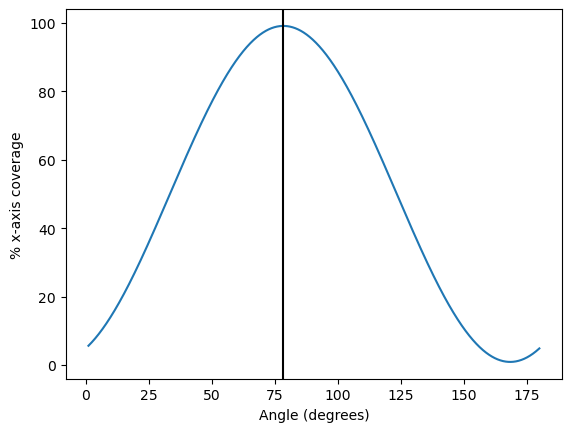

The horizontal variance is maximized to approximately 541 after a 78.3 degree rotation.
That rotation distributes 99.08% of the total variance onto the x-axis


In [11]:
# Maximizing horizontal dispersion
def rotate(angle, data=centered_data):
    angle = np.radians(-angle)
    rotation_matrix = np.array([[cos(angle), -sin(angle)], [sin(angle), cos(angle)]])
    return rotation_matrix @ data

angles = np.arange(1, 180, 0.1)
x_variances = [(rotate(angle)[0].var()) for angle in angles]

np_x_variances = np.array(x_variances)
percent_x_variances = 100 * np_x_variances / total_variance
optimal_index = np.argmax(percent_x_variances)
optimal_angle = angles[optimal_index]
plt.plot(angles, percent_x_variances)
plt.axvline(optimal_angle, c='k')
plt.xlabel('Angle (degrees)')
plt.ylabel('% x-axis coverage')
plt.show()

max_coverage = percent_x_variances[optimal_index]
max_x_var = x_variances[optimal_index]

print(f"The horizontal variance is maximized to approximately {int(max_x_var)} after a {optimal_angle:.1f} degree rotation.")
print(f"That rotation distributes {max_coverage:.2f}% of the total variance onto the x-axis")

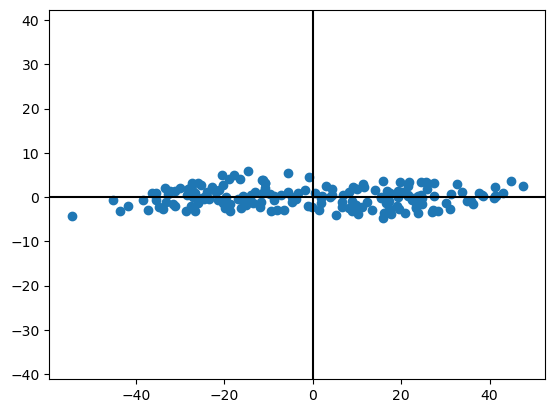

In [12]:
# Plotting rotated data with high x-axis coverage
best_rotated_data = rotate(optimal_angle)
plt.scatter(best_rotated_data[0], best_rotated_data[1])
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.axis('equal')
plt.show()

In [14]:
# Reducing the rotated data to 1D for the purposes of clustering
x_values = best_rotated_data[0]
sorted_x_values = sorted(x_values)
cluster_size = int(x_values.size / 3)
small_cutoff = max(sorted_x_values[:cluster_size])
large_cutoff = min(sorted_x_values[-cluster_size:])
print(f"A 1D threshold of {small_cutoff:.2f} separates the small-sized and medium-sized customers.")
print(f"A 1D threshold of {large_cutoff:.2f} separates the medium-sized and large-sized customers.")

A 1D threshold of -14.61 separates the small-sized and medium-sized customers.
A 1D threshold of 15.80 separates the medium-sized and large-sized customers.


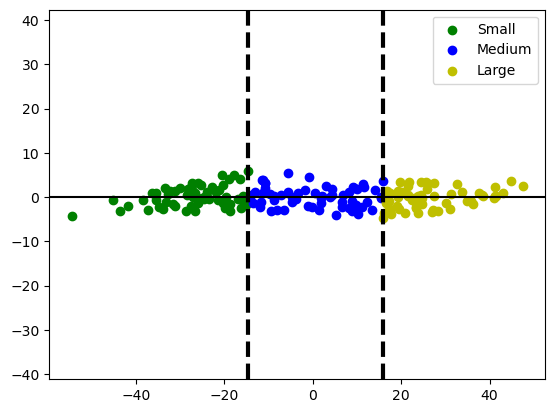

In [16]:
# Plotting horizontal customer data separated into three segments
def plot_customer_segments(horizontal_2d_data):
    small, medium, large = [], [], []
    cluster_labels = ['Small', 'Medium', 'Large']
    for x_value, y_value in horizontal_2d_data.T:
        if x_value <= small_cutoff:
            small.append([x_value, y_value])
        elif small_cutoff < x_value <= large_cutoff:
            medium.append([x_value, y_value])
        else:
            large.append([x_value, y_value])
        
    for i, cluster in enumerate([small, medium, large]):
        cluster_x_vlaues, cluster_y_values = np.array(cluster).T
        plt.scatter(cluster_x_vlaues, cluster_y_values, color=['g', 'b', 'y'][i], label=cluster_labels[i])

    plt.axhline(0, c='k')
    plt.axvline(large_cutoff, c='k', linewidth=3, linestyle='--')
    plt.axvline(small_cutoff, c='k', linewidth=3, linestyle='--')
    plt.axis('equal')
    plt.legend()
    plt.show()
        
plot_customer_segments(best_rotated_data)

In [17]:
# Reproducing 2D data from a 1D array
zero_y_values = np.zeros(x_values.size)
reproduced_data = rotate(-optimal_angle, data=[x_values, zero_y_values])

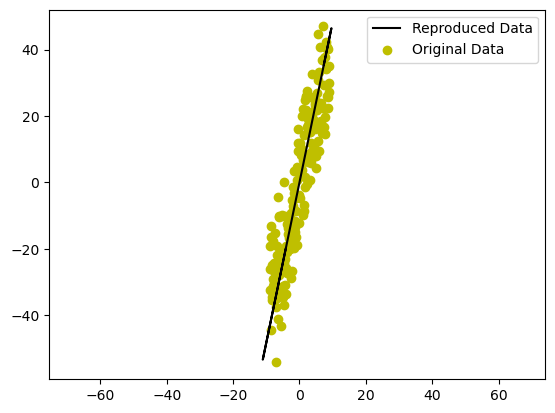

In [22]:
# Plotting reproduced and original data
plt.plot(reproduced_data[0], reproduced_data[1], c='k', label='Reproduced Data')
plt.scatter(centered_data[0], centered_data[1], c='y', label='Original Data')
plt.axis('equal')
plt.legend()
plt.show()

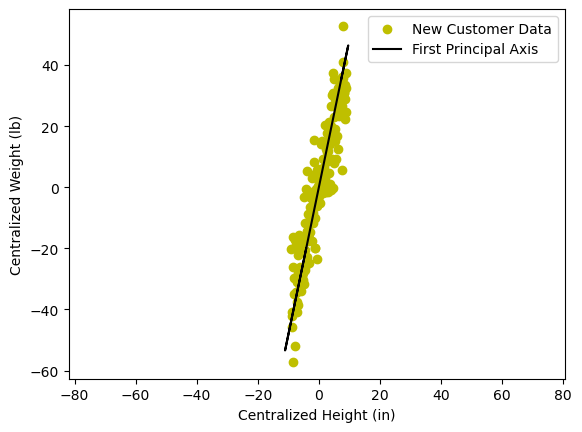

In [23]:
# First Principal Axis: The linear direction in which the data's variance is maximized
# Second Principal Axis: Perpendicular to the first; ot represemts the remaining variance not covered by the first p axis
# Simulating and plotting new customer data
np.random.seed(1)
new_heights = np.arange(60, 78, 0.11)
random_fluctuations = np.random.normal(scale=10, size=new_heights.size)
new_weights = 4 * new_heights - 130 + random_fluctuations
new_centered_data = np.array([new_heights - new_heights.mean(), new_weights - new_weights.mean()])
plt.scatter(new_centered_data[0], new_centered_data[1], c='y', label='New Customer Data')
plt.plot(reproduced_data[0], reproduced_data[1], c='k', label='First Principal Axis')
plt.xlabel('Centralized Height (in)')
plt.ylabel('Centralized Weight (lb)')
plt.axis('equal')
plt.legend()
plt.show()

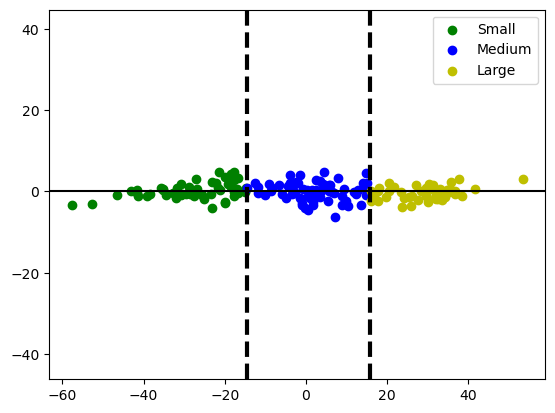

In [24]:
# Reproducing and segmenting our new customer data
new_horizontal_data = rotate(optimal_angle, data=new_centered_data)
plot_customer_segments(new_horizontal_data)

## 14.2 Dimension Reduction using PCA and scikit-learn